In [17]:
seeds = range(5)
max_iters = 10
threshold = 10**(-5)
lambdas = np.logspace(-4, 0, 30)
gamma = 1
split_ratios = [0.9]
degree_max = 10
degrees = range(1,degree_max+1)

In [13]:
rmse_tr, rmse_te, abse_tr, abse_te = np.load('./results_of_lengthy_computations/errors_tuning_parameters_penalized_logistic_regression_basic_feature_expansion.npy')

In [14]:
ind_lambda_min_mean_rmse_te = np.argmin(np.mean(rmse_te,axis = 2),axis = 3)[:,0]

In [15]:
ind_lambda_min_median_rmse_te = np.argmin(np.median(rmse_te,axis = 2),axis = 3)[:,0]

The testing RMSEs can be groupwise represented as a histogram, always taking the lambda minimizing the mean of the error for each value of the maximal degree of polynomial terms added.

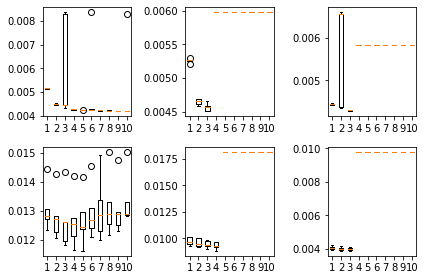

In [18]:
num_col = 3
num_row = int(np.ceil(rmse_te.shape[0]/num_col))

for ind_split_ratio in range(rmse_te.shape[1]):
    f, axs = plt.subplots(num_row, num_col)
    ind_lambda_min_mean_rmse_te = np.argmin(np.mean(rmse_te[:,ind_split_ratio,:,:,:],axis = 1),axis = 2)

    for ind_group in range(rmse_te.shape[0]):
        #print('RMSE of group ' + str(ind_group) + ' with lambdas = ' + str(lambdas[ind_lambda_min_mean_rmse_te[ind_group]]) + 'minimizing mean(RMSE)')
        with np.printoptions(precision=3, suppress=False):
           # print("RMSE of group = {ind}, with lambdas = {ls} minimizing mean(RMSE) :".format(
            #    ind = ind_group, ls= lambdas[ind_lambda_min_median_rmse_te[ind_group]]))
            box_plot_data = rmse_te[ind_group,ind_split_ratio,:,np.arange(len(degrees)),ind_lambda_min_mean_rmse_te[ind_group]]
        #print(box_plot_data)
        
        ax = axs[ind_group // num_col][ind_group % num_col]
        ax.boxplot(box_plot_data.T)
    
        #ax.set_xlabel("pc")
        #ax.set_ylabel("pca_2")

    plt.tight_layout()
    plt.savefig("./plots/boxplot_error_groups_penalized_logistic_regression_basic_feature_engineering_mean_split_ratio_" + str(split_ratios[ind_split_ratio]).replace('.','_'))
    plt.show()

ABSE of group = 0, with lambdas = [8.532e-03 2.212e-02 1.000e-04 1.000e-04 1.000e-04 6.210e-03 2.807e-01
 1.083e-01 4.520e-03 3.562e-04] minimizing median(RMSE) :
[[1901. 1898. 1811. 1806. 1880.]
 [1313. 1340. 1315. 1319. 1354.]
 [1304. 1302. 3248. 1241. 3202.]
 [1205. 1176. 1206. 1213. 1186.]
 [1200. 1158. 1204. 1201. 1170.]
 [1177. 3243. 1206. 1201. 1174.]
 [1173. 1142. 1172. 1173. 1165.]
 [1171. 1127. 1168. 1185. 1162.]
 [1170. 1117. 1161. 1179. 1163.]
 [1160. 1111. 1157. 1177. 3202.]]
ABSE of group = 1, with lambdas = [3.039e-02 6.210e-03 2.043e-01 1.000e-04 1.000e-04 1.000e-04 1.000e-04
 1.000e-04 1.000e-04 1.000e-04] minimizing median(RMSE) :
[[2169. 2188. 2196. 2094. 2161.]
 [1577. 1579. 1569. 1473. 1489.]
 [1502. 1500. 1531. 1441. 1430.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]
 [2667. 2741. 2723. 2705. 2700.]]
ABSE of grou

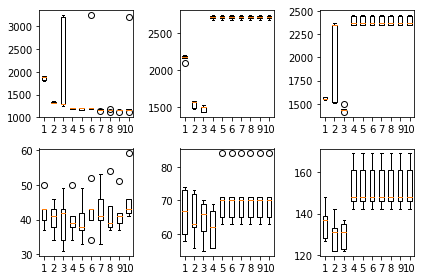

In [95]:
num_col = 3
num_row = int(np.ceil(rmse_te.shape[0]/num_col))

for ind_split_ratio in range(rmse_te.shape[1]):
    f, axs = plt.subplots(num_row, num_col)
    ind_lambda_min_median_rmse_te = np.argmin(np.median(rmse_te[:,ind_split_ratio,:,:,:],axis = 1),axis = 2)

    for ind_group in range(rmse_te.shape[0]):
        #print('RMSE of group ' + str(ind_group) + ' with lambdas = ' + str(lambdas[ind_lambda_min_mean_rmse_te[ind_group]]) + 'minimizing mean(RMSE)')
        with np.printoptions(precision=3, suppress=False):
           # print("ABSE of group = {ind}, with lambdas = {ls} minimizing median(RMSE) :".format(
            #    ind = ind_group, ls= lambdas[ind_lambda_min_median_rmse_te[ind_group]]))
            box_plot_data = abse_te[ind_group,ind_split_ratio,:,np.arange(len(degrees)),ind_lambda_min_mean_rmse_te[ind_group]]
        #print(box_plot_data)
        
        ax = axs[ind_group // num_col][ind_group % num_col]
        ax.boxplot(box_plot_data.T)
    
        ax.set_title("group "+str(ind_group))
        ax.set_xticklabels(np.around(ax.get_xticks(),2))
        ax.set_xlabel("degree")

    plt.tight_layout()
    plt.savefig("./plots/boxplot_abs_error_groups_penalized_logistic_regression_basic_feature_engineering_median_split_ratio_" + str(split_ratios[ind_split_ratio]).replace('.','_'))
    plt.show()